In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
y = df['Label']
X_train, X_val, y_train, y_val = train_test_split(df['Lemma'], y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [ ]:
batch_size = 10000
X_train_batches = [X_train[i:i+batch_size] for i in range(0, X_train.shape[0], batch_size)]
y_train_batches = [y_train[i:i+batch_size] for i in range(0, y_train.shape[0], batch_size)]

In [ ]:
nb = MultinomialNB(alpha = 0.01, fit_prior= True)
svm= SVC(kernel='poly', C=10, gamma='scale', random_state=42,class_weight='balanced')
lr = LogisticRegression(random_state=42, class_weight='balanced',C=10, solver='saga', max_iter=1000)
from sklearn.ensemble import  VotingClassifier
ensemble = VotingClassifier([ ('svm', svm),('lr',lr),('nb',nb)], voting='hard')


In [ ]:
for i in range(len(X_train_batches)):
    ensemble.fit(X_train_batches[i], y_train_batches[i])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
y_pred = ensemble.predict(X_val)
print(f"Batch {i+1} classification report:")
print(classification_report(y_val, y_pred))

Batch 9 classification report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.53     17605
           1       0.61      0.65      0.63     20621

    accuracy                           0.58     38226
   macro avg       0.58      0.58      0.58     38226
weighted avg       0.58      0.58      0.58     38226



In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
cm = confusion_matrix(y_val,y_pred)

In [13]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

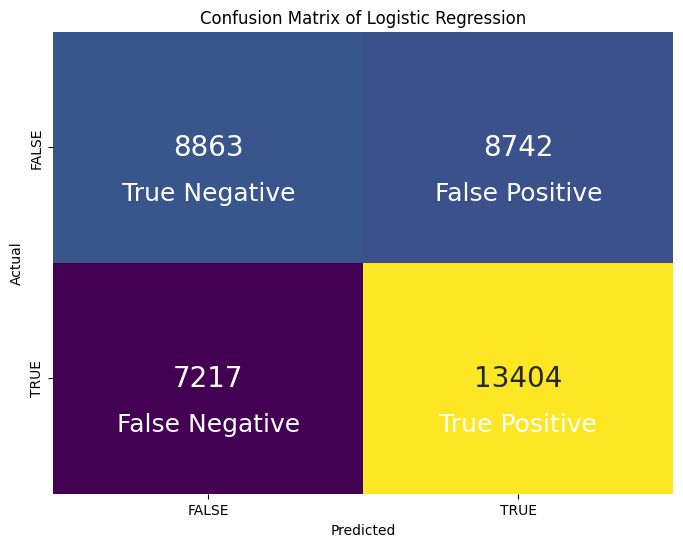

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [ ]:
df4=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [ ]:
df7=df4[['Lemma','clusters']]

In [ ]:
df7 = df7.rename(columns={'clusters': 'Label'})

In [ ]:
X_test = df7['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = ensemble.predict(X_test_transformed)

In [ ]:
y_true=df7['Label']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.14      0.13      0.13       880
           1       0.87      0.87      0.87      5765

    accuracy                           0.77      6645
   macro avg       0.50      0.50      0.50      6645
weighted avg       0.77      0.77      0.77      6645



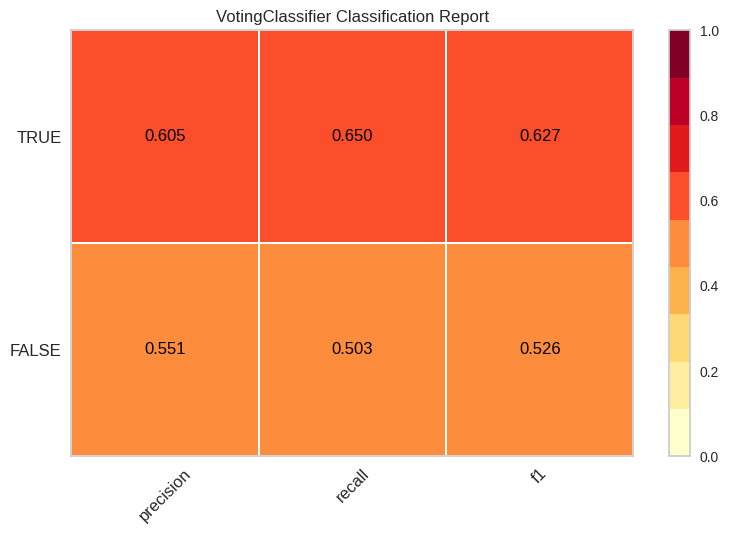

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ensemble, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_batches[i], y_train_batches[i])
visualizer.score(X_val, y_val)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

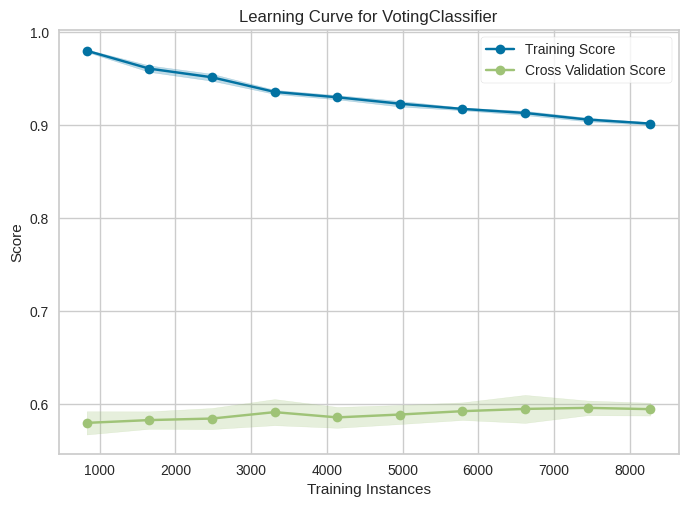

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    ensemble, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_batches[i], y_train_batches[i])
lc_viz.show()

In [ ]:
import random

# Select a random row index from Data2
random_index = random.randint(0, len(df7)-1)

# Get the text from the randomly selected row
text =df7.iloc[random_index]['Lemma']

# Transform the text using the vectorizer
text_transformed = vectorizer.transform([text])

# Use the model to predict the label of the text
label_pred = ensemble.predict(text_transformed)

# Print the text and predicted label
print("Text: ", text)
if label_pred == 1:
    print('The text is classified as TRUE')
else:
    print('The text is classified as FALSE')
#print("Predicted Label: ", label_pred[0])

Text:    Federal Law Enforcement Use Unmarked Vehicles Grab Protesters Portland Streets
The text is classified as TRUE
